# Decision Tree

In [1]:
import pandas as pd
import numpy as np
import random 
import matplotlib.pyplot as plt 

df_user =  pd.read_csv('User_Data.csv')

# Display the DataFrame
print(df_user.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [2]:
# Importing the dataset  
X = df_user.iloc[:, [2, 3]].values  
y = df_user.iloc[:, 4].values  

In [3]:
# Splitting the dataset into the Training set and Test set  
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [4]:
# Feature Scaling  
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 

In [5]:
#Fitting Decision Tree classifier to the training set  

from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In the above code, we have created a classifier object, in which we have passed two main parameters;

- `criterion='entropy'`: Criterion is used to measure the quality of split, which is calculated by information gain given by entropy.
- `random_state=0"`: For generating the random states.

In [6]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)  

In [7]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

C:\Users\hp\AppData\Local\Temp\ipykernel_18076\1231252719.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[0].scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
C:\Users\hp\AppData\Local\Temp\ipykernel_18076\1231252719.py:36: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[1].scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


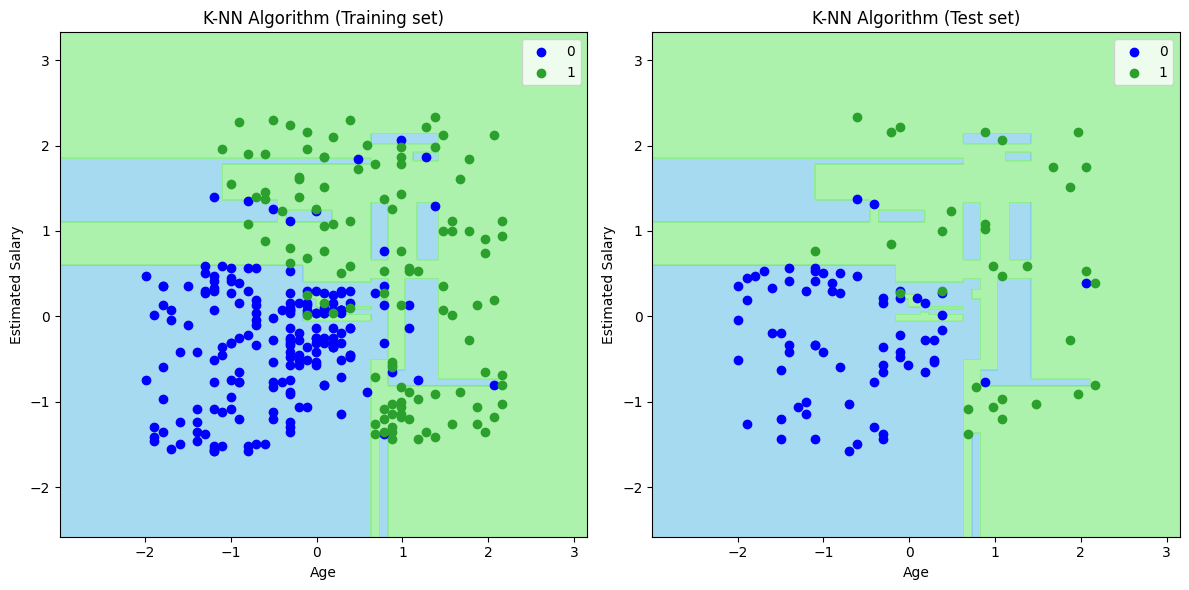

In [8]:
# Importing libraries
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Set up the figure with two subplots in one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Visulaizing the training set result
x_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))
axes[0].contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=ListedColormap(['#87CEEB', '#90EE90']))
axes[0].set_xlim(X1.min(), X1.max())
axes[0].set_ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    axes[0].scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                    c=ListedColormap(['#0000FF', '#2ca02c'])(i), label=j)

axes[0].set_title('K-NN Algorithm (Training set)')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Estimated Salary')
axes[0].legend()

# Visulaizing the test set result
x_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))
axes[1].contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=ListedColormap(['#87CEEB', '#90EE90']))
axes[1].set_xlim(X1.min(), X1.max())
axes[1].set_ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    axes[1].scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                    c=ListedColormap(['#0000FF', '#2ca02c'])(i), label=j)

axes[1].set_title('K-NN Algorithm (Test set)')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Estimated Salary')
axes[1].legend()

plt.tight_layout()
plt.show()


As we can see in the above image that there are some green data points within the purple region and vice versa. So, these are the incorrect predictions which we have discussed in the confusion matrix.